In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

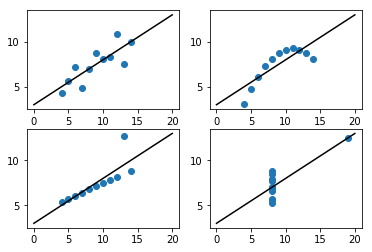

'\nWhile all 4 graphs have similar summary statistics and lines of best fit, the patters in the data\nare very different for all 4 and would not have been clear without graphing. In the first one, we see\nthe data increase aproximately linearly along the line of best fit, albeit with some variation. In the\nsecond graph, the data seems to be negative quadratic. In the third the data is mostly linear but with a\nslope less than 1/2 but an outlier pulls the slope back up, while in the fourth graph, the points are \nnearly vertical with the exception of an outlier which reduces the slope to 1/2. \n'

In [7]:
""" Problem 1 """

data = np.load("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/anscombe.npy")

def prob1(data):
    x = np.linspace(0,20,1000)
    y = 0.5*x + 3

    plt.subplot(221)
    plt.plot(data[:,0], data[:,1], 'o')
    plt.plot(x,y,'k')

    plt.subplot(222)
    plt.plot(data[:,2], data[:,3], 'o')
    plt.plot(x,y,'k')

    plt.subplot(223)
    plt.plot(data[:,4], data[:,5], 'o')
    plt.plot(x,y,'k')

    plt.subplot(224)
    plt.plot(data[:,6], data[:,7], 'o')
    plt.plot(x,y,'k')

    plt.show()

prob1(data)
"""
While all 4 graphs have similar summary statistics and lines of best fit, the patters in the data
are very different for all 4 and would not have been clear without graphing. In the first one, we see
the data increase aproximately linearly along the line of best fit, albeit with some variation. In the
second graph, the data seems to be negative quadratic. In the third the data is mostly linear but with a
slope less than 1/2 but an outlier pulls the slope back up, while in the fourth graph, the points are 
nearly vertical with the exception of an outlier which reduces the slope to 1/2. 
"""

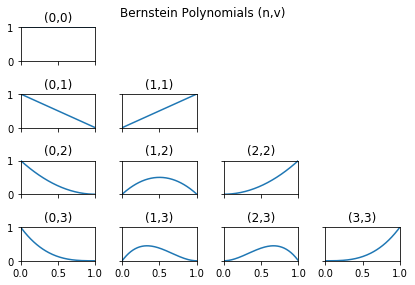

In [20]:
""" Problem 2 """
import scipy.misc

def prob2(x):
    for n in range(4):
        for v in range(n+1):
            Bernstein = scipy.misc.comb(n,v)*(x**v)*((1-x)**(n-v))
            plt.subplot(4, 4, 4*n + v + 1)
            plt.plot(x, Bernstein)
            plt.axis([0,1,0,1])
            plt.title("(" + str(v) + "," + str(n)+ ")")
            if n!=3:
                plt.tick_params(labelbottom="off")
            if v%4:
                plt.tick_params(labelleft="off")

    plt.suptitle("Bernstein Polynomials (n,v)")
    plt.tight_layout()
    plt.show()

x = np.linspace(-1, 1, 200)
prob2(x)

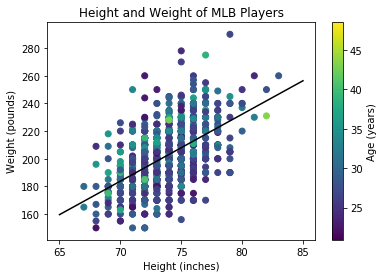

In [10]:
""" Problem 3 """

height, weight, age = np.load("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/MLB.npy").T

def prob3(heigh, weight, age):
    m,b = np.polyfit(height, weight, 1)
    x = np.linspace(65,85,1000)
    y = m*x + b
    plt.plot(x,y,'k')

    plt.scatter(height, weight, c=age)
    plt.xlabel("Height (inches)")
    plt.ylabel("Weight (pounds)")

    cbar = plt.colorbar()
    cbar.set_label("Age (years)")

    plt.title("Height and Weight of MLB Players")
    plt.show()
    
    
height, weight, age = np.load("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/MLB.npy").T
prob3(height,weight,age)

In [27]:
""" Problem 4 """


def prob4(year, magnitude, longitude, latitude):
    pass

    
year, magnitude, longitude, latitude  = np.load('/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/earthquakes.npy').T
prob4(year, magnitude, longitude, latitude)

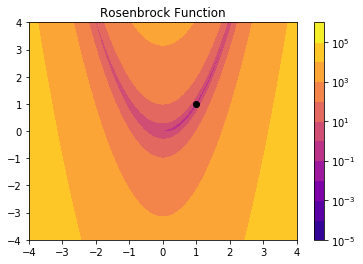

In [21]:
""" Problem 5 """
from matplotlib.colors import LogNorm

def plot5(x):
    X, Y = np.meshgrid(x, x.copy())
    Z = (1-X)**2 + 100*((Y-X**2)**2)
    plt.contourf(X, Y, Z, cmap="plasma", norm=LogNorm())
    plt.colorbar()
    plt.plot(1,1,"ko")
    plt.title("Rosenbrock Function")
    plt.show()

x = np.linspace(-4, 4, 1000)
plot5(x)

In [29]:
""" Problem 6 """


def prob6(pop, GDP, avmale, avfemale, countries):
    positions = np.arange(len(countries))

pop, GDP, avmale, avfemale = np.load('/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/countries.npy').T

countries = ["Austria", "Bolivia", "Brazil", "China",
            "Finland", "Germany", "Hungary", "India",
            "Japan", "North Korea", "Montenegro", "Norway",
            "Peru", "South Korea", "Sri Lanka", "Switzerland",
            "Turkey", "United Kingdom", "United States", "Vietnam"]

prob6(pop, GDP, avmale, avfemale, countries)